In [1]:
#Import the libraries and print their versions
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
import itertools

<h2>1.2.1 Load the data and get an overview of the data</h2>

In [2]:
df = pd.read_csv('ISLR/data/Boston.csv',index_col=0)

In [3]:
r, c = df.shape
print(c)
for a, b in enumerate(df, 1):
    list = "".join('{}. \'{}\''.format(a, b))
    print (list, end=" ")

14
1. 'crim' 2. 'zn' 3. 'indus' 4. 'chas' 5. 'nox' 6. 'rm' 7. 'age' 8. 'dis' 9. 'rad' 10. 'tax' 11. 'ptratio' 12. 'black' 13. 'lstat' 14. 'medv' 

In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
len(df.index)

506

In [6]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<h2>Plot lstat, rm, and age against the response values.</h2>
(regression line, confidence intervals, the Pearson coefficient of correlation, and the p value -> not necessary at this stage)

[Text(0, 0.5, 'median house value'),
 Text(0.5, 0, 'percent of households with low socioeconomic status')]

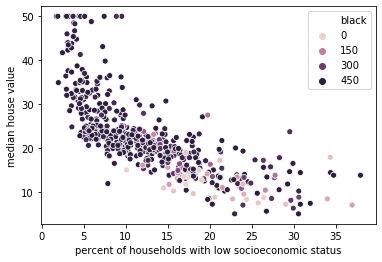

In [7]:
#sns.set(style="dark", color_codes=True)
ax=sns.scatterplot(x = 'lstat', y = 'medv', hue = 'black',
               data=df, marker='o')
ax.set(xlabel='percent of households with low socioeconomic status', ylabel = 'median house value')

[Text(0, 0.5, 'median house value'),
 Text(0.5, 0, 'average number of rooms per house')]

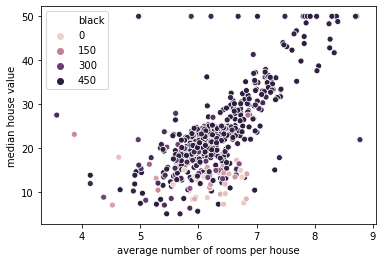

In [8]:
#sns.set(style="dark", color_codes=True)
ax=sns.scatterplot(x = 'rm', y = 'medv', hue = 'black',
               data=df, marker='o')
ax.set(xlabel='average number of rooms per house', ylabel = 'median house value')

[Text(0, 0.5, 'median house value'), Text(0.5, 0, 'average age of houses')]

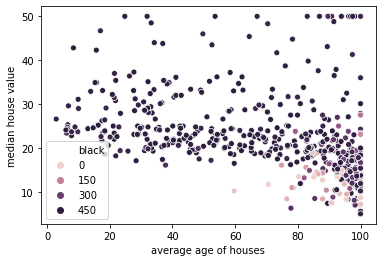

In [9]:
#sns.set(style="dark", color_codes=True)
ax=sns.scatterplot(x = 'age', y = 'medv', hue = 'black',
               data=df, marker='o')
ax.set(xlabel='average age of houses', ylabel = 'median house value')

<h2>1.2.2 Simple linear regressions</h2>

In [10]:
result = sm.OLS.from_formula('medv ~ lstat', df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           5.08e-88
Time:                        18:20:42   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [11]:
result = sm.OLS.from_formula('medv ~ rm', df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           2.49e-74
Time:                        18:20:46   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

In [12]:
result = sm.OLS.from_formula('medv ~ age', df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           1.57e-18
Time:                        18:20:50   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.0

<h1>Interpretation</h1>

<h3>General</h3>

coef: when all features are at 0, the expected response is the intercept.    
t - value: If the t - value is 0, it indicates that the sample results equal the null hypothesis. The value of the t - value increases, as the difference between the sample data and the null hypothesis increases.  
p - value: If the p-value is less than the alpha level (0.05), the null hypothesis is rejected and there is evidence that the data tested are not normally distributed.  
F- statistic: shows whether at least one feature has a significant effect.  
Residual standard error: tells us how large the prediction error is on the training data or in-sample.  

<h3>coef, t-val, p-val, f-statistic, r-squared</h3>
medv - median value of owner-occupied homes in \$1000s(median price of the house).  
lstat - lower status of the population (percent).  
rm - average number of rooms per dwelling.  
age - proportion of owner-occupied units built prior to 1940.  

**lstat**  
coef: this value tells us that after every unit increases in lstat (an increase in the households with low socioeconomic status) the medv (median house price) decreases by 0.95005 units.  
t - value: The t - value of -24.53 is the same as the p-value of 0 given n and p.  
p - value together with the F- statistic: tells us that there is a significant linear relation between the response and the predictor variables.  
R-squared: tells us that there is in this case a 54.4\% variability in the median house price.  


**rm**  
coef: this value tells us that after every unit increases in rm (avg number of rooms) the medv (median house price) increases by 9.1021 units.  
t - value: The t - value of 21.72 shows whether the coefficient for this variable is meaningful to the model. In our case the t - value of -13.08 is for the Intercept -34.67, which is divided by the standard error 2.65 in our case.
p - value together with the F- statistic: For F-statistic, if the value was close to 1, it would mean that there is no relationship between the response and the predictor. If the value is greater than 1 it means that there is a relationship. Our F-statistic is 472, thus the conclusion is that there is a relationship between medv and rm. Furthermore, if the p-value was high, then 
the model with more paramters would fail to perform better than a model with few parameters, thus there is no significant boost). In our case the significance is high and it is highly unlikely that there is no relationship between medv and rm.  
R-squared: tells us that in this case 48\% of the cause for the median house price is the rm.  

**age**  
coef: this value tells us that after every unit increases in age (proportion of owner occupied units built before 1940) the medv (median house price) decreases by 0.1232 units.  
t - value: The t - value of -9.137 shows whether the coefficient for this variable is meaningul to the model. In our case the t - value of 31.006 is for the Intercept 30.98, which is divided by the standard error 0.999 in our case.  
p - value together with the F- statistic: For F-statistic, if the value was close to 1, it would mean that there is no relationship between the response and the predictor. If the value is greater than 1 it means that there is a relationship. Our F-statistic is 83, thus the conclusion is that there is a relationship between medv and age. Furthermore, if the p-value was high, then 
the model with more paramters would fail to perform better than a model with few parameters, thus there is no significant boost). In our case the significance is high and it is unlikely that there is no relationship between medv and age.  
R-squared: tells us that in this case 14\% of the cause for the median house price is the age.  

In [13]:
result = sm.OLS.from_formula('medv ~ lstat', df).fit()
result.conf_int()

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


In [14]:
result = sm.OLS.from_formula('medv ~ rm', df).fit()
result.conf_int()

,0,1
Intercept,-39.876641,-29.464601
rm,8.278855,9.925363


In [15]:
result = sm.OLS.from_formula('medv ~ age', df).fit()
result.conf_int()

,0,1
Intercept,29.015752,32.941604
age,-0.149647,-0.096679


<h1>Interpretation</h1>

<h3>General</h3>

The confidence intervals were obtained together with the summaries from the OLS Regression Results. The 2.5\% and 97.5\% can be seen i the same row as coef, std err, t, and other. However, in case the tables are needed separately as well, the separate tables were added just in case. A confidence interval is a matter of how confident one wants to be in the accepting or rejecting of the null hypothesis. For example, if we want to be 95\% confident that there is a difference between something, we will have a 5\% confidence interval. Also, if we want to create a 95\% confidence interval, we need to construct it in such a way that if we had 100 confidence intervals, 95 of them would capture the true population mean. 95\% because 2.5\% to 97.5\% corresponds to 95\% of the data.

<h3>2.5% and 97.5%</h3>

**lstat**  
The confidence interval on the difference between households with low economic status and house prices is entirely in the negative. So even this small sample provides evidence, and also the fact that neither interval includes 0 indicates that the two parameter values are significantly different from zero, which was also established by the previous F statistics. Further, it is visible in the table that lstat coefficient is -0.9500 and the interval is centered around it with the values -1.026, -0.874.  

**rm**  
The confidence interval on the difference between the average number of rooms and house prices provides evidence, and also the fact that neither interval includes 0 indicates that the two parameter values are significantly different from zero, which was also established by the previous F statistics. Further, it is visible in the table that rm coefficient is 9.1021 and the interval is centered around it with the values 8.279, 9.925.        

**age**  
The confidence interval on the difference between proportion of owner-occupied units built prior to 1940 and house prices is entirely in the negative. So even this small sample provides evidence, and also the fact that neither interval includes 0 indicates that the two parameter values are significantly different from zero, which was also established by the previous F statistics. Further, it is visible in the table that the age coefficient is -0.1232 and the interval is centered around it with the values -0.150, -0.097.  
           
In later stages we will see that in general the prediction interval is always wider than the confidence interval, because the prediction interval is associated with a random variable (which is yet to be forecasted). Where, the confidence interval is associated with a parameter and is a frequentist concept. 

In [16]:
lm = sm.OLS.from_formula('medv ~ lstat', df)
result = lm.fit()
new = pd.DataFrame([5, 10, 15], columns=['lstat'])
predictions = result.get_prediction(new)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


In [17]:
lm = sm.OLS.from_formula('medv ~ rm', df)
result = lm.fit()
new = pd.DataFrame([5, 6.5, 8], columns=['rm'])
predictions = result.get_prediction(new)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,10.839924,0.613410,9.634769,12.045079,-2.214474,23.894322
1,24.493088,0.307657,23.888639,25.097536,11.480391,37.505784
2,38.146251,0.776633,36.620414,39.672088,25.058353,51.234149


In [18]:
lm = sm.OLS.from_formula('medv ~ age', df)
result = lm.fit()
new = pd.DataFrame([25, 50, 75], columns=['age'])
predictions = result.get_prediction(new)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,27.899610,0.699094,26.526112,29.273107,11.090368,44.708852
1,24.820542,0.454307,23.927973,25.713110,8.043748,41.597335
2,21.741474,0.388844,20.977518,22.505429,4.971031,38.511917


<h1>Interpretation</h1>

<h3>mean, obs_ci_lower and obs_ci_upper</h3> 

Prediction intervals are confidence intervals for not only the mean or expected value, but for the actual value of Y. Thus, they are wider since they try to contain not just the average value of Y, but the actual value of Y.  
Taking as an example the lstat from above. The 95\% prediction interval associated with the lstat value of 10 is (12.83, 37.28). The interval is centered around a certain value, in this case the predicted value of 25.05 for medv when lstat equals the value 10. When the value is 5, then the prediction interval is 17.57, 42.04, which is centered around the fit value 29.80 for medv when lstat equals the value 5.  
The same interpretations go for the medv ~ rm and medv ~ age. Another example is the only interval that goes into minus values, since when looking at the medv ~ rm example then we see that the 95\% prediction interval associated with the rm value of 5 is (-2.21, 23.89). The interval is again centered around the predicted value of 10.84 for medv when rm equals the value 5.

<h2>1.2.4 Multiple linear regressions</h2>

In [19]:
lm = sm.OLS.from_formula('medv ~ lstat + rm + age', df)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     296.2
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          1.20e-110
Time:                        18:22:19   Log-Likelihood:                -1582.4
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     502   BIC:                             3190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1753      3.182     -0.369      0.7

<h1>Interpretation</h1>
<h3>medv ~ lstat + rm + age</h3>

The R-squared value, which is 63.9\% tells us that this model is highly significant.  
What can be noticed in the summary is the fact that only the lstat feature value is negative, which means that it is not only significant, but also has a relationship to lowering the price of the house. As mentioned already earlier lstat is the \% lower status of the population

Thus, the conclusion is that the lstat feature has a relation to lower house prices. Furthermore, the feature with negative values, also has a highly significant p-value, which means that it is unlikely that there is no relationship between medv and the given feature.  

On the other hand, the following features have positive values:  
rm - average number of rooms  
age - proportion of owner occupied units built prior to 1940  

The conclusion for this is, that houses with more rooms have a relationship with increasing the house value. The p-value for rm for example is also highly significant, which also means that it is unlikely that there is no relationship between the house value and the number of rooms.

In [20]:
# All columns (except medv, which is our response)
lm = sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv'])), df)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        18:22:50   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

<h1>Interpretation</h1>
<h3>medv ~ . </h3>

The R-squared value, which is 74.1\% tells us that this model is highly significant.  
What can be noticed in the summary is the fact that many feature values are negative, which means that they are not only significant, but also lower the price of the house. More specifically, features such as:  
crim - per capita crime rate by town  
dis - weighted distances to five Boston employment centres  
nox - nitric oxides concentration  
ptratio - pupil - teacher ratio by town  

Thus, the conclusion is that features such as crime in the area, or the occurrence of nitric oxide concentration have a relation to lower house prices. Furthermore, the features with negative values also have highly significant p-values, which means that it is unlikely that there is no relationship between medv and the given feature.  

On the other hand, the following features have positive values:  
chas - charles river  
rm - average number of rooms  
rad - index of accessibility to radial highways  

The conclusion for this is, that houses near the charles river, or houses with more rooms have a relationship with increasing the house value. 

<h2>The table of correlation coefficients</h2>

In [21]:
#df.corr()
df[['ptratio', 'lstat', 'age', 'indus', 'nox', 'crim', 'rad', 'tax', 'chas', 'black', 'rm', 'medv', 'zn', 'dis']].corr().round(2)

,ptratio,lstat,age,indus,nox,crim,rad,tax,chas,black,rm,medv,zn,dis
ptratio,1.00,0.37,0.26,0.38,0.19,0.29,0.46,0.46,-0.12,-0.18,-0.36,-0.51,-0.39,-0.23
lstat,0.37,1.00,0.60,0.60,0.59,0.46,0.49,0.54,-0.05,-0.37,-0.61,-0.74,-0.41,-0.50
age,0.26,0.60,1.00,0.64,0.73,0.35,0.46,0.51,0.09,-0.27,-0.24,-0.38,-0.57,-0.75
indus,0.38,0.60,0.64,1.00,0.76,0.41,0.60,0.72,0.06,-0.36,-0.39,-0.48,-0.53,-0.71
nox,0.19,0.59,0.73,0.76,1.00,0.42,0.61,0.67,0.09,-0.38,-0.30,-0.43,-0.52,-0.77
crim,0.29,0.46,0.35,0.41,0.42,1.00,0.63,0.58,-0.06,-0.39,-0.22,-0.39,-0.20,-0.38
rad,0.46,0.49,0.46,0.60,0.61,0.63,1.00,0.91,-0.01,-0.44,-0.21,-0.38,-0.31,-0.49
tax,0.46,0.54,0.51,0.72,0.67,0.58,0.91,1.00,-0.04,-0.44,-0.29,-0.47,-0.31,-0.53
chas,-0.12,-0.05,0.09,0.06,0.09,-0.06,-0.01,-0.04,1.00,0.05,0.09,0.18,-0.04,-0.10
black,-0.18,-0.37,-0.27,-0.36,-0.38,-0.39,-0.44,-0.44,0.05,1.00,0.13,0.33,0.18,0.29


<h2>Table of p-values corresponding to the significance levels of the correlations</h2>

In [22]:
def calc_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcol = pd.DataFrame(columns=df.columns)
    pval = dfcol.transpose().join(dfcol, how='outer')
    for r in df.columns:
        for c in df.columns:
            pval[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pval

In [23]:
calc_pvalues(df[['ptratio', 'lstat', 'age', 'indus', 'nox', 'crim', 'rad', 'tax', 'chas', 'black', 'rm', 'medv', 'zn', 'dis']])

,ptratio,lstat,age,indus,nox,crim,rad,tax,chas,black,rm,medv,zn,dis
ptratio,0,0,0,0,0,0,0,0,0.0062,0.0001,0,0,0,0
lstat,0,0,0,0,0,0,0,0,0.2259,0,0,0,0,0
age,0,0,0,0,0,0,0,0,0.0518,0,0,0,0,0
indus,0,0,0,0,0,0,0,0,0.1575,0,0,0,0,0
nox,0,0,0,0,0,0,0,0,0.0403,0,0,0,0,0
crim,0,0,0,0,0,0,0,0,0.2094,0,0,0,0,0
rad,0,0,0,0,0,0,0,0,0.8687,0,0,0,0,0
tax,0,0,0,0,0,0,0,0,0.4244,0,0,0,0,0
chas,0.0062,0.2259,0.0518,0.1575,0.0403,0.2094,0.8687,0.4244,0,0.2733,0.0402,0.0001,0.3378,0.0257
black,0.0001,0,0,0,0,0,0,0,0.2733,0,0.0039,0,0.0001,0


In [24]:
corr = df[['ptratio', 'lstat', 'age', 'indus', 'nox', 'crim', 'rad', 'tax', 'chas', 'black', 'rm', 'medv', 'zn', 'dis']].corr().round(2)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,ptratio,lstat,age,indus,nox,crim,rad,tax,chas,black,rm,medv,zn,dis
ptratio,1.00,0.37,0.26,0.38,0.19,0.29,0.46,0.46,-0.12,-0.18,-0.36,-0.51,-0.39,-0.23
lstat,0.37,1.00,0.60,0.60,0.59,0.46,0.49,0.54,-0.05,-0.37,-0.61,-0.74,-0.41,-0.50
age,0.26,0.60,1.00,0.64,0.73,0.35,0.46,0.51,0.09,-0.27,-0.24,-0.38,-0.57,-0.75
indus,0.38,0.60,0.64,1.00,0.76,0.41,0.60,0.72,0.06,-0.36,-0.39,-0.48,-0.53,-0.71
nox,0.19,0.59,0.73,0.76,1.00,0.42,0.61,0.67,0.09,-0.38,-0.30,-0.43,-0.52,-0.77
crim,0.29,0.46,0.35,0.41,0.42,1.00,0.63,0.58,-0.06,-0.39,-0.22,-0.39,-0.20,-0.38
rad,0.46,0.49,0.46,0.60,0.61,0.63,1.00,0.91,-0.01,-0.44,-0.21,-0.38,-0.31,-0.49
tax,0.46,0.54,0.51,0.72,0.67,0.58,0.91,1.00,-0.04,-0.44,-0.29,-0.47,-0.31,-0.53
chas,-0.12,-0.05,0.09,0.06,0.09,-0.06,-0.01,-0.04,1.00,0.05,0.09,0.18,-0.04,-0.10
black,-0.18,-0.37,-0.27,-0.36,-0.38,-0.39,-0.44,-0.44,0.05,1.00,0.13,0.33,0.18,0.29


<h1>Interpretation</h1>
<h2>Correlation \$r and \$p and heatmap</h2>

The first table prints the correlation coefficients. The coefficient is calculated as a strong possible correlation (close to number 1) and strong negative correlation (close to number - 1). Positive correlation means that as one of the numbers increases, the second number will increase as well. Negative correlation means that as one number increases, the other will decrease. In the table with the correlation coefficients, the variables are reordered according to the level of the correlation which helps to identify the most associated variables faster. Thus the conclusion is that features such as age and lstat, indus and lstat or indus and age, nox and age or nox and lstat, tax indus, and tax nox are strongly correlated and as if one of the numbers goes up the other will go up as well (as they are close to 1). The opposite, the numbers close -1 mean that for example for lstat and medv, that if the number of lstat increases, then the number of medv decreases.  

The second table prints the table of p - values corresponding to the significance levels of the correlations. In general the p - value evaluates how well the data rejects the null hypothesis, which shows that there is no relation between two compared features. The cutoff for specifying the significance is known as the alpha value, which is most commonly set to 0.05. Thus, if the p - value is less than the 0.05 then the null hypothesis is rejected. As can be see from the results above the p-value of for example age and lstat is 0.000, which is less than the significance level 0.05. The conclusion is that lstat and age are significantly correlated with a correlation coefficient of 0.6 and p-value of 0.000. As an opposite chas and age or chas and nox have a correlation coefficient of 0.09 and a p - value of 0.05 and 0.04, meaning that they are not significantly correlated.  

Lastly the table is printed in colors as a heatmap. In the generated colored heatmap, negative correlations are in blue and positive ones in red color. If there is no correlation between two variables, meaning when the correlation is close to 0, then the color is grey. Thus with the heatmap, we can see that age and nox, tax and indus or medv and rm are highly correlated. The heatmap visualization helps to identify the correlations faster, however the explanation for the numbers is the same as the explanation for the correlation coefficient table above.

<h2>1.2.5 Using the multiple linear regression model</h2>

In [25]:
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

selected_predictor_values = expand_grid({'lstat': [5, 10, 15], 'rm': [5, 6.5, 8]})
selected_predictor_values

,lstat,rm
0,5,5.0
1,5,6.5
2,5,8.0
3,10,5.0
4,10,6.5
5,10,8.0
6,15,5.0
7,15,6.5
8,15,8.0


In [27]:
result = smf.ols('medv ~ lstat + rm', df).fit()
predictions = result.get_prediction(selected_predictor_values)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,20.903875,0.856315,19.221481,22.586269,9.889729,31.918021
1,28.546057,0.377499,27.804387,29.287727,17.635923,39.456192
2,36.188239,0.663860,34.883959,37.492519,25.225479,47.150999
3,17.692084,0.693873,16.328837,19.055330,6.722152,28.662016
4,25.334266,0.263915,24.815754,25.852777,14.437027,36.231505
5,32.976448,0.739470,31.523618,34.429277,21.995024,43.957872
6,14.480292,0.570322,13.359785,15.600799,3.537875,25.422709
7,22.122474,0.304004,21.525200,22.719748,11.221204,33.023745
8,29.764656,0.865184,28.064837,31.464475,18.747835,40.781477


<h1>Interpretation</h1>

<h3>mean, obs_ci_lower and obs_ci_upper</h3>

This interpretation will be similar to the interpretation of the prediction intervals for the individual predictors. The difference now is the combined medv ~ lstat + rm and the expanded grid which allows to get predicted responses over various combinations of values for predictor variables.
In our case we expanded the grid with 'lstat': \[5, 10, 15\] and 'rm': \[5, 6.5, 8\]. And the selected predictor values can be viewed in the table for 'selected_predictor_values'.  

Now, taking as an example the row 0 from the table above. The 95% prediction interval associated with the lstat value of 5 + rm value of 5.0 is (9.89, 31.92). The interval is centered around a certain value, in this case the predicted value of 20.90 for medv when lstat equals the value 5 and rm equals the value 5.0.  
Another example is the line 7. The 95% prediction interval associated with the lstat value of 15 + rm value of 6.5 is (11.22, 33.02). The interval is centered around a certain value, in this case the predicted value of 22.12 for medv when lstat equals the value 15 and rm equals the value 6.5.  

Thus, all mean, obs_ci_lower and obs_ci_upper can be interpreted with the same approach, by looking at the selected_predictor_values in the first table and the results for fit, lower and upper interval values in the second table.